In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from networkx.algorithms.approximation import clique, vertex_cover
from networkx.algorithms.bipartite.covering import min_edge_cover

In [2]:
pd.set_option('display.max_rows', 500)

### Preprocessing the 'Graph of Europe' data:
> Copy all European countries and read them into pandas.DataFrame

> Parse the table from "https://en.wikipedia.org/wiki/List_of_countries_and_territories_by_land_borders", using IMPORT_HTML() from googlesheets

> Read 'Land borders' data into pandas.DataFrame and then filter by countries

In [9]:
Europe = nx.Graph()
countries = pd.read_csv('countries.csv')
Europe.add_nodes_from(countries['country'])

# sheet_id = '1XqOtPkiE_Q0dfGSoyxrH730RkwrTczcRbDeJJpqRByQ'
# sheet_name = 'borders'
# url = f'https://docs.google.com/spreadsheets/d' \
#     '/1AYODVslftthH3aI8gS0d4wgyLZwwXMpD4bQOSv5M4GI/gviz/tq?tqx=out:csv&sheet={sheet_name}'
# df = pd.read_csv(url)

In [4]:
doc_id = '1AYODVslftthH3aI8gS0d4wgyLZwwXMpD4bQOSv5M4GI'
url = url = f'https://docs.google.com/spreadsheets/d/{doc_id}/export?format=csv'
df = pd.read_csv(url)
df = df.drop([0], axis=0)
df

,Country or territory\n*(Territories without full sovereignty in italics)* [2],Total length of land borders,Unnamed: 2,No. of distinct land borders,No. of distinct land neighbours,Land border neighbours\nand border length\n\n*(Territories without full sovereignty in italics) [2](#) = No. of distinct \nland boundaries with that country or territory*
1,* Abkhazia*,382,237,2,2,Russia: 241 km (150 mi)\n Georgia: 141 km (88 mi)
2,* Afghanistan*,"5,529","3,436",6,6,People's Republic of China: 76 km (47 mi)\n Ir...
3,* Albania*,720,450,4,4,Greece: 282 km (175 mi)\n* Kosovo*:[4] 112 km ...
4,* Algeria*,"6,47","4,02",7,7,"Libya: 982 km (610 mi)\n Mali: 1,376 km (855 m..."
5,* Andorra*,120,75,2,2,France: 56.6 km (35.2 mi)\n Spain: 63.7 km (39...
6,* Angola*,"5,198","3,23",5,4,"Democratic Republic of the Congo (2): 2,511 km..."
7,* Antigua and Barbuda*,0,0,0,0,NaN
8,* Argentina*,"9,665","6,006",6,5,"Bolivia: 832 km (517 mi)\n Brazil: 1,224 km (7..."
9,* Armenia*,"1,254",779,5,4,Azerbaijan (6): 787 km (489 mi)[8]\n Georgia: ...
10,* Australia*,0,0,0,0,NaN


Have to drop and rename some columns 

In [5]:
df.columns

Index(['Country or territory\n*(Territories without full sovereignty in italics)* [2]',
       'Total length of land borders', 'Unnamed: 2',
       'No. of distinct land borders', 'No. of distinct land neighbours',
       'Land border neighbours\nand border length\n\n*(Territories without full sovereignty in italics) [2](#) = No. of distinct \nland boundaries with that country or territory*'],
      dtype='object')

In [6]:
borders = df.rename(columns={'Country or territory\n*(Territories'
                   ' without full sovereignty in italics)* [2]': 
                   'country',
                   'Land border neighbours\nand border'
                   ' length\n'
                   '\n*(Territories without full sovereignty in italics) '
                   '[2](#) = No. of distinct \nland boundaries with that country or territory*': \
                   'neighbours'
                  }).drop(['Total length of land borders', 'Unnamed: 2'
                           ,'No. of distinct land borders', 'No. of distinct land neighbours']
                        , axis=1)
borders['country'] = borders['country'].str.replace('*', '').str.strip()
borders['country'] = borders['country'].str.replace(r'\[([0-9_]+)\]', '', regex=True) \
    .str.replace(r'\(([0-9_])+\)', '', regex=True)
# borders['neighbours'] = borders['neighbours'].str.split('\n')
borders.at[63, 'country'] = 'France'
borders.at[131, 'country'] = 'Netherlands'
borders

/var/folders/6d/jcsgnwtj1857x2zvzznd28jw0000gn/T/ipykernel_3856/2355719927.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  borders['country'] = borders['country'].str.replace('*', '').str.strip()


,country,neighbours
1,Abkhazia,Russia: 241 km (150 mi)\n Georgia: 141 km (88 mi)
2,Afghanistan,People's Republic of China: 76 km (47 mi)\n Ir...
3,Albania,Greece: 282 km (175 mi)\n* Kosovo*:[4] 112 km ...
4,Algeria,"Libya: 982 km (610 mi)\n Mali: 1,376 km (855 m..."
5,Andorra,France: 56.6 km (35.2 mi)\n Spain: 63.7 km (39...
6,Angola,"Democratic Republic of the Congo (2): 2,511 km..."
7,Antigua and Barbuda,NaN
8,Argentina,"Bolivia: 832 km (517 mi)\n Brazil: 1,224 km (7..."
9,Armenia,Azerbaijan (6): 787 km (489 mi)[8]\n Georgia: ...
10,Australia,NaN


In [7]:
borders[['country']]

,country
1,Abkhazia
2,Afghanistan
3,Albania
4,Algeria
5,Andorra
6,Angola
7,Antigua and Barbuda
8,Argentina
9,Armenia
10,Australia


In [10]:
edges_df = countries.merge(borders, how='left')
edges_df['neighbours'] =  edges_df['neighbours'].str.split('\n')
edges_df['neighbours'] = edges_df['neighbours'].fillna("").apply(list)
edges_df

,country,neighbours
0,Armenia,"[Azerbaijan (6): 787 km (489 mi)[8], Georgia:..."
1,Albania,"[Greece: 282 km (175 mi), * Kosovo*:[4] 112 km..."
2,Andorra,"[France: 56.6 km (35.2 mi), Spain: 63.7 km (3..."
3,Austria,"[Czech Republic: 362 km (225 mi), Germany: 78..."
4,Belarus,"[Latvia: 141 km (88 mi), Lithuania: 502 km (3..."
5,Belgium,"[France: 620 km (390 mi), Germany (6):[12] 16..."
6,Bosnia and Herzegovina,"[Croatia (2): 932 km (579 mi), Montenegro: 22..."
7,Bulgaria,"[Greece: 494 km (307 mi), North Macedonia: 14..."
8,Croatia,"[Bosnia and Herzegovina (2): 932 km (579 mi), ..."
9,Cyprus,[* Akrotiri and Dhekelia*[20] (United Kingdom)...


In [11]:
for index, row in edges_df.iterrows():
    for neighbour in row['neighbours']:
        temp = neighbour.split(':')[0].replace('*', '')
        temp = re.sub("\[([0-9_]+)\]", "", temp)
        temp = re.sub("\(([0-9_])+\)", "", temp)
        temp = temp.strip()
        if temp in list(edges_df['country']):
            # print(row['country'], temp)
            Europe.add_edge(row['country'], temp)


#### 1a

In [ ]:
plt.figure(figsize=(16, 9))
nx.draw_planar(Europe, node_size=None, with_labels=True)

#### 1b

In [13]:
G = Europe.subgraph(max(nx.connected_components(Europe)))

In [14]:
print('|V|:', Europe.number_of_nodes())
print('|E|:', Europe.number_of_edges())

min_graph_degree = 1
max_graph_degree = 0
# degree = 0 is too dull
for country, degree in Europe.degree():
    if degree != 0:
        min_graph_degree = min(min_graph_degree, degree)
        max_graph_degree = max(max_graph_degree, degree)
print('Minimal graph degree:', min_graph_degree)
print('Maximal graph degree:', max_graph_degree)

# nx.diameter(Europe) -> "Found infinite path length because the graph is not connected"
# max_diameter = 0
# for component in nx.connected_components(Europe):
#     max_diameter = max(max_diameter, nx.diameter(Europe.subgraph(component)))
print('Diameter:', nx.diameter(G))

print('Girth:', min([len(cycle) for cycle in nx.cycle_basis(G)]))

# for component in nx.connected_components(Europe):
print(f'\nCenter:', nx.center(G))
print('Minimum vertex cut:' \
      , nx.minimum_node_cut(G))
print('Minimum edge cut:' \
      , nx.minimum_edge_cut(G))  

|V|: 49
|E|: 92
Minimal graph degree: 1
Maximal graph degree: 9
Diameter: 8
Girth: 3

Center: ['Austria', 'Belarus', 'Croatia', 'Czech Republic', 'Germany', 'Hungary', 'Lithuania', 'Poland', 'Russia', 'Slovakia', 'Slovenia', 'Switzerland', 'Ukraine']
Minimum vertex cut: {'Germany'}
Minimum edge cut: {('Spain', 'Portugal')}


#### 1c

Colors:
1    14
0    12
2    11
3     6
4     1
dtype: int64


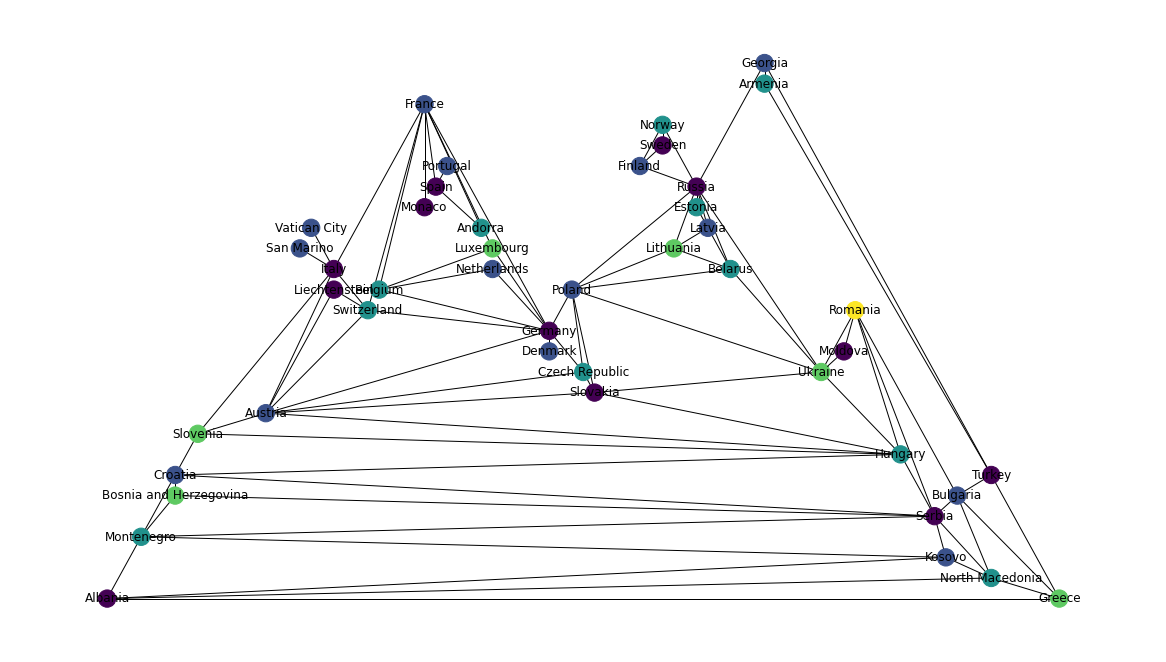

In [15]:
node_colors = nx.greedy_color(G)
color_map = []
for node in G:
    color_map.append(node_colors[node])
# color_map
print('Colors:')
print(pd.Series(node_colors.values()).value_counts())
plt.figure(figsize=(16, 9))
nx.draw_planar(G, node_color=color_map, with_labels=True)

#### 1d: TODO

In [ ]:
plt.figure(figsize=(16,9))
nx.draw_planar(Europe, node_size=None, with_labels=True, edge_color=[1])

In [ ]:
Europe.edges()

#### 1e

In [ ]:
cliques = list(nx.find_cliques_recursive(G))
max_clique_size = 0
for element in cliques:
    max_clique_size = max(max_clique_size, len(element))
# max_clique_size
# for element in cliques:
#     if len(element) == max_clique_size:
#         print('Maximum clique:', element)
#         break
print('Maximum clique:', clique.max_clique(G))

#### 1f

In [ ]:
print('Maximal independent set:', nx.maximal_independent_set(G))
print('Size:', len(nx.maximal_independent_set(G)))

#### 1g

In [ ]:
print('Maximum matching:', nx.maximal_matching(G))

#### 1h

In [ ]:
print(len(vertex_cover.min_weighted_vertex_cover(G)))
print('Minimum vertex cover:', vertex_cover.min_weighted_vertex_cover(G))

#### 1i: TODO

In [ ]:
# for component in nx.connected_components(Europe):
#     print(min_edge_cover(Europe.subgraph(component)))
# test = nx.Graph()
# test.add_nodes_from([1, 2, 3])
# test.add_edges_from([(1, 2), (2, 3), (3, 1)])
# min_edge_cover(test)


#### 1j: TODO

In [ ]:
nx.is_k_edge_connected(Europe, 2)

#### 1m

In [ ]:
for component in list(nx.k_edge_components(Europe, 2)):
#     nx.draw(Europe.subgraph(component))
    print(component)

#### 1